In [21]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [334]:
df = pd.read_csv("data/composed/mira_top_10.csv")
df.head()

av_MPI_Allgather_callCount  av_MPI_Allgather_totalBytes  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                        71.0                        407.0   

   av_MPI_Allgather_totalCycles  av_MPI_Allgather_totalTime  \
0                           0.0                    0.000000   
1                           0.0                    0.000000   
2                           0.0                    0.000000   
3                           0.0                    0.000000   
4                     8802459.0                    0.005502   

   av_MPI_Allgatherv_callCount  av_MPI_Allgatherv_totalBytes  \
0                          0.0                           0.0   
1                          0.0                           0.0   
2                          0.0                           0.0   
3                          0.0                           0.0   
4                          0.0                           0.0   

   av_MPI_Allgatherv_totalCycles  av_MPI_Allgatherv_totalTime  \
0                            0.0                          0.0   
1                            0.0                          0.0   
2                            0.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          0.0   

   av_MPI_Allreduce_callCount  av_MPI_Allreduce_totalBytes       ...        \
0                         0.0                 0.000000e+00       ...         
1                         0.0                 0.000000e+00       ...         
2                         0.0                 0.000000e+00       ...         
3                         0.0                 0.000000e+00       ...         
4                   1171296.0                 7.988400e+09       ...         

   IS_CONSECUTIVE_ONLY  IS_SINGLE_ONLY  IS_NO_TASKS  IS_OTHER  \
0                    0               0            0         1   
1                    0               0            0         1   
2                    0               0            0         1   
3                    0               0            0         1   
4                    0               0            0         1   

   OVERBURN_CORE_HOURS  IS_OVERBURN    gflops      gops  ram_store_bpop  \
0                  0.0            0  0.000002  0.472985        0.003272   
1                  0.0            0  0.000014  0.386436        0.045971   
2                  0.0            0  0.000013  0.434031        0.038475   
3                  0.0            0  0.000013  0.416289        0.036515   
4                  0.0            0  0.120117  0.641522        0.007066   

   ram_fetch_bpop  
0        0.000402  
1        0.005665  
2        0.004761  
3        0.003328  
4        0.005570  

[5 rows x 943 columns]

In [335]:
# rand = np.random.randint(0, len(df.index))

In [336]:
feature_labels = ['gflops', 'gops', 'ram_store_bpop', 'ram_fetch_bpop', 'av_stdMpiTime', 'RUNTIME_SECONDS', 'WALLTIME_SECONDS'] # Specify the features you want

# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df[feature_labels])
df_normalized = pd.DataFrame(np_scaled, columns = feature_labels)

# Average
df_normalized['zero_execName'] = df['zero_execName']
df_normalized = df_normalized.groupby(['zero_execName']).median()
# df_normalized.head(10)

# Take a random sample
# random_sample = df_normalized.iloc[rand].values

In [337]:
angles = np.linspace(0, 2*np.pi, len(feature_labels), endpoint=False) # Set the angle
# Close the plot
# random_sample = np.concatenate((random_sample, [random_sample[0]]))
angles = np.concatenate((angles, [angles[0]]))

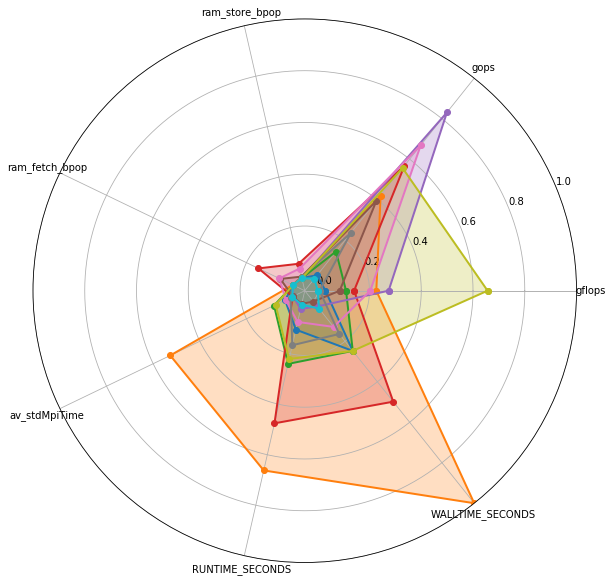

In [338]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)   # Set polar axis
for i in range(len(df_normalized.index) - 1):
    row = df_normalized.iloc[i].values
    row = np.concatenate((row, [row[0]]))
    ax.plot(angles, row, 'o-', linewidth=2)  # Draw the plot (or the frame on the radar chart)
    ax.fill(angles, row, alpha=0.25)  #Fulfill the area
ax.set_thetagrids(angles * 180/np.pi, feature_labels)  # Set the label for each axis
ax.set_rmax(1.0)
# ax.set_title(df['zero_execName'].iloc[rand])  # Set the executable as the title
ax.grid(True)

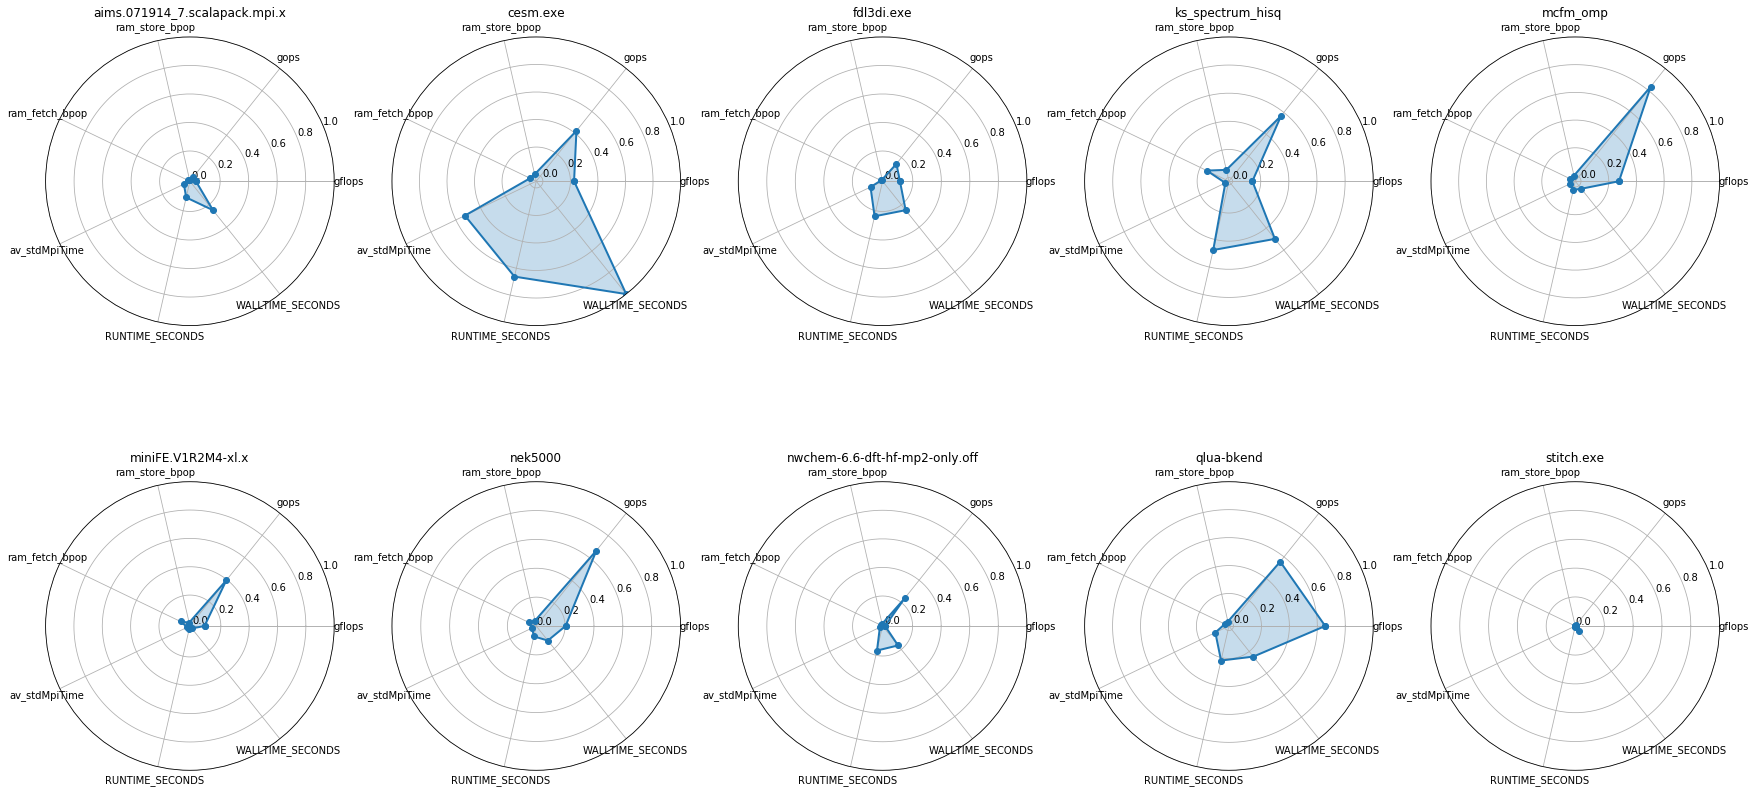

In [345]:
fig=plt.figure(figsize=(30,15))
for i in range(len(df_normalized.index) - 1):
    ax = fig.add_subplot(2 , 5, 1 + i, polar=True)   # Set polar axis
    row = df_normalized.iloc[i].values
    row = np.concatenate((row, [row[0]]))
    ax.plot(angles, row, 'o-', linewidth=2)  # Draw the plot (or the frame on the radar chart)
    ax.fill(angles, row, alpha=0.25)  #Fulfill the area
    ax.set_thetagrids(angles * 180/np.pi, feature_labels)  # Set the label for each axis
    ax.set_rmax(1.0)
    ax.set_title(df_normalized.iloc[i].name)  # Set the executable as the title
    ax.grid(True)